### 58 clustering

In [177]:
import numpy as np
import pandas as pd
from numpy.linalg import norm
import random
np.random.seed(42)
df = pd.DataFrame({'x1': np.concatenate((np.random.randn(40),np.random.randn(40)+5)),
                   'x2': np.concatenate((np.random.randn(40),np.random.randn(40)+10))})
df.head()

,x1,x2
0,0.496714,-0.219672
1,-0.138264,0.357113
2,0.647689,1.477894
3,1.523030,-0.518270
4,-0.234153,-0.808494


In [178]:
x1_min=df.x1.min()
x2_min=df.x2.min()
x1_max=df.x1.max()
x2_max=df.x2.max()
x1_min, x1_max, x2_min, x2_max

(-1.9596701238797756,
 6.564643655814006,
 -1.9187712152990415,
 12.190455625809978)

In [179]:
random.uniform(x1_min, x1_max)

5.087106764575821

In [180]:
centroid_1 = [random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)]
centroid_2 = [random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)]
centroid_1, centroid_2

([3.536598925780579, 1.7794324270456896],
 [5.886673277784838, 6.553955802211127])

In [181]:
data = df.values
for i in range(10):
    clusters = []
    for point in data:
        centroid_1_dist = norm(centroid_1 - point)
        centroid_2_dist = norm(centroid_2 - point)
        cluster = 1
        if centroid_1_dist > centroid_2_dist:
            cluster = 2
        clusters.append(cluster)
    df['cluster'] = clusters
    centroid_1 = [round(df[df.cluster==1].x1.mean(),3), round(df[df.cluster==1].x2.mean(),3)]
    centroid_2 = [round(df[df.cluster==2].x1.mean(),3), round(df[df.cluster==2].x2.mean(),3)]
centroid_1, centroid_2

([-0.219, 0.01], [4.971, 9.967])

### 59 KMeans

In [182]:
from sklearn.cluster import KMeans
df.head()

,x1,x2,cluster
0,0.496714,-0.219672,1
1,-0.138264,0.357113,1
2,0.647689,1.477894,1
3,1.523030,-0.518270,1
4,-0.234153,-0.808494,1


In [183]:
kmeans = KMeans(n_clusters = 2, max_iter = 100, random_state = 42)
kmeans.fit(df)
kmeans.cluster_centers_

array([[ 4.97095654,  9.96710013,  2.        ],
       [-0.21863684,  0.01017314,  1.        ]])

### 60 KMeans prediction

In [184]:
y_kmeans = kmeans.predict(df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [185]:
df['y_kmeans'] = y_kmeans
df.head()

,x1,x2,cluster,y_kmeans
0,0.496714,-0.219672,1,1
1,-0.138264,0.357113,1,1
2,0.647689,1.477894,1,1
3,1.523030,-0.518270,1,1
4,-0.234153,-0.808494,1,1


### 61 WCSS (within-cluster sum-of-squared)

In [186]:
from sklearn.cluster import KMeans
np.random.seed(42)
df = pd.DataFrame({'x1': np.concatenate((np.random.randn(40),np.random.randn(40)+5)),
                   'x2': np.concatenate((np.random.randn(40),np.random.randn(40)+10))})
df.head()

,x1,x2
0,0.496714,-0.219672
1,-0.138264,0.357113
2,0.647689,1.477894
3,1.523030,-0.518270
4,-0.234153,-0.808494


In [187]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df)
    wcss.append(round(kmeans.inertia_, 2))
wcss # gradually decrease as k increase

[2659.63, 138.19, 112.01, 87.57, 69.72, 55.51, 49.43, 42.41, 36.54]

### 62 elbow method

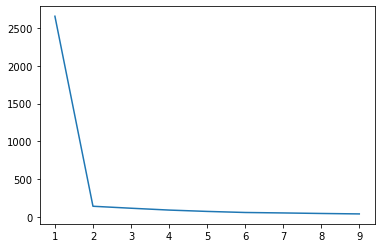

In [188]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,10)), wcss) # k=2 is the best

### 63 Agglomerative

In [189]:
from sklearn.cluster import AgglomerativeClustering
df.head()

,x1,x2
0,0.496714,-0.219672
1,-0.138264,0.357113
2,0.647689,1.477894
3,1.523030,-0.518270
4,-0.234153,-0.808494


In [190]:
cluster = AgglomerativeClustering(n_clusters=2)
cluster.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [191]:
df['cluster'] = cluster.labels_
df

,x1,x2,cluster
0,0.496714,-0.219672,1
1,-0.138264,0.357113,1
2,0.647689,1.477894,1
3,1.523030,-0.518270,1
4,-0.234153,-0.808494,1
...,...,...,...
75,5.821903,9.285649,0
76,5.087047,11.865775,0
77,4.700993,10.473833,0
78,5.091761,8.808697,0


### 64 linkage (distance between clusters) & affinity
- linkage
1. single-linkage: min
2. complete-linkage: max
3. average-linkage: mean
- affinity
<br>euclidean, l1, l2, manhattan, cosine, precomputed

In [192]:
from sklearn.cluster import AgglomerativeClustering
df.drop(['cluster'], axis=1, inplace=True)
df.head()

,x1,x2
0,0.496714,-0.219672
1,-0.138264,0.357113
2,0.647689,1.477894
3,1.523030,-0.518270
4,-0.234153,-0.808494


In [193]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='complete', affinity='manhattan')
cluster .fit_predict(df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [194]:
df['cluster'] = cluster.labels_
df

,x1,x2,cluster
0,0.496714,-0.219672,0
1,-0.138264,0.357113,0
2,0.647689,1.477894,0
3,1.523030,-0.518270,0
4,-0.234153,-0.808494,0
...,...,...,...
75,5.821903,9.285649,1
76,5.087047,11.865775,1
77,4.700993,10.473833,1
78,5.091761,8.808697,1


### 65 DBSCAN (density-based spatial clustering of applications with noise)

In [195]:
from sklearn.cluster import DBSCAN
df.drop(['cluster'], axis=1, inplace=True)
df.head()

,x1,x2
0,0.496714,-0.219672
1,-0.138264,0.357113
2,0.647689,1.477894
3,1.523030,-0.518270
4,-0.234153,-0.808494


In [196]:
cluster = DBSCAN(eps=0.6, min_samples=7)
cluster.fit(df)
df['cluster'] = cluster.labels_
df

,x1,x2,cluster
0,0.496714,-0.219672,0
1,-0.138264,0.357113,0
2,0.647689,1.477894,-1
3,1.523030,-0.518270,-1
4,-0.234153,-0.808494,0
...,...,...,...
75,5.821903,9.285649,-1
76,5.087047,11.865775,-1
77,4.700993,10.473833,-1
78,5.091761,8.808697,1


### 66 DBSCAN outlier

In [197]:
df.head()

,x1,x2,cluster
0,0.496714,-0.219672,0
1,-0.138264,0.357113,0
2,0.647689,1.477894,-1
3,1.523030,-0.518270,-1
4,-0.234153,-0.808494,0


In [198]:
df['cluster'].value_counts() # -1 is outlier

-1    39
 0    25
 1     9
 2     7
Name: cluster, dtype: int64